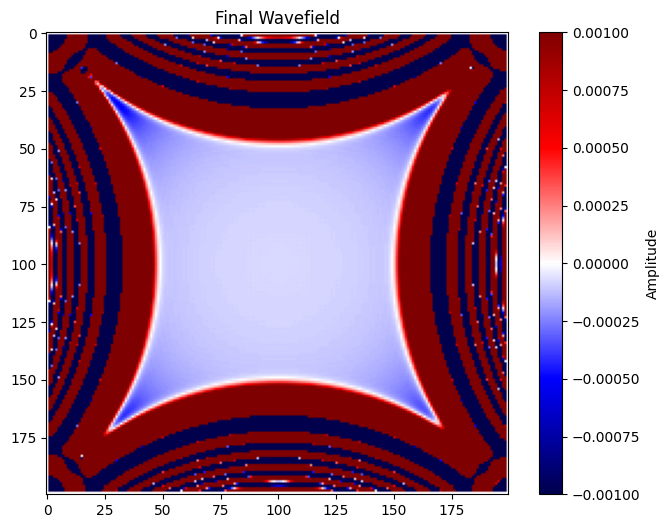

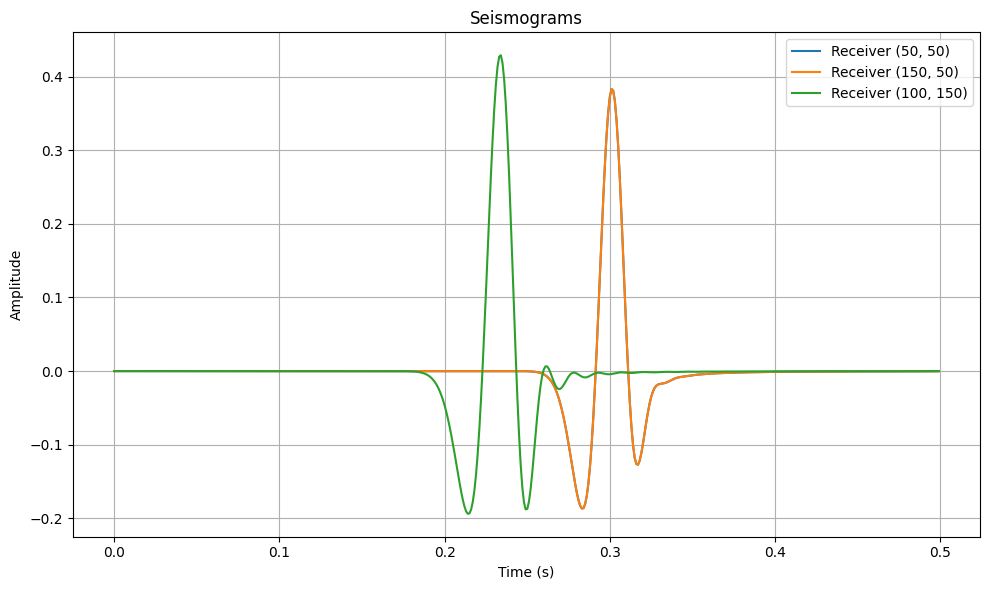

In [1]:
# Earthquake Wave Propagation Simulation (2D FDTD)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
nx, ny = 200, 200  # Grid size
dx = dy = 10.0  # Spatial step (m)
dt = 0.001  # Time step (s)
c0 = 3000.0  # Wave speed (m/s)
time_steps = 500  # Number of time steps

# Source parameters
source_x, source_y = nx // 2, ny // 2
f0 = 25.0  # Dominant frequency

def ricker_wavelet(t, f0):
    return (1 - 2 * (np.pi * f0 * t)**2) * np.exp(-(np.pi * f0 * t)**2)

# Initialize wavefields
u = np.zeros((nx, ny))
u_prev = np.zeros_like(u)
u_next = np.zeros_like(u)

# Seismogram receivers
receivers = [(50, 50), (150, 50), (100, 150)]
seismograms = {loc: [] for loc in receivers}

# Coefficient
coeff = (c0 * dt / dx)**2

# Simulation loop
frames = []
for n in range(time_steps):
    t = n * dt
    source = ricker_wavelet(t - 1.5 / f0, f0)
    u[source_x, source_y] += source

    # FDTD update
    u_next[1:-1,1:-1] = (2 * u[1:-1,1:-1] - u_prev[1:-1,1:-1] +
                        coeff * (
                            u[2:,1:-1] + u[:-2,1:-1] +
                            u[1:-1,2:] + u[1:-1,:-2] -
                            4 * u[1:-1,1:-1]))

    # Save seismogram data
    for loc in receivers:
        seismograms[loc].append(u[loc])

    # Store frame for animation
    if n % 5 == 0:
        frames.append(u.copy())

    u_prev, u, u_next = u, u_next, u_prev

# Plot wavefield snapshot
plt.figure(figsize=(8, 6))
plt.imshow(u, cmap='seismic', vmin=-0.001, vmax=0.001)
plt.title('Final Wavefield')
plt.colorbar(label='Amplitude')
plt.show()

# Animation
fig, ax = plt.subplots(figsize=(6, 5))
cax = ax.imshow(frames[0], cmap='seismic', vmin=-0.001, vmax=0.001)
fig.colorbar(cax)

def animate(i):
    cax.set_array(frames[i])
    ax.set_title(f"Wavefield at t = {i*5*dt:.3f} s")
    return [cax]

ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=50)
ani.save('wave_propagation.gif', writer='pillow')
plt.close()

# Plot seismograms
plt.figure(figsize=(10, 6))
for loc in receivers:
    plt.plot(np.arange(time_steps) * dt, seismograms[loc], label=f'Receiver {loc}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Seismograms')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('seismograms.png')
plt.show()
